<a href="https://colab.research.google.com/github/09481845456/Predicting-Feedback-on-Online-Food-Orders-Using-Logistic-Regression/blob/main/3B_BERCADES_EXER6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Feedback on Online Food Orders Using Logistic Regression**

# Part 1: Data Loading and Preprocessing

## Import Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

# Load the Dataset

In [ ]:
df = pd.read_csv('onlinefoods.csv')
print(df.head())


   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

# Handle Missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n",missing_values)
#impute missing values with the mean of the column
df.fillna(df.mean(numeric_only=True), inplace=True)

Missing Values:
 Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


## Encode Categorical Variables

In [ ]:
# Convert categorical variables into one-hot encoded format
df_encoded = pd.get_dummies(df, columns=['Gender', 'Marital Status', 'Occupation', 'Family size'], drop_first=True)
# Label Encoding (for ordinal categories)
Income_mapping = {'Below Rs.10000': 0, '10001 to 25000': 1, '25001 to 50000': 2, 'More than 50000': 3}
df_encoded['Monthly Income'] = df['Monthly Income'].map(Income_mapping)
print(df_encoded.head())

   Age  Monthly Income Educational Qualifications  latitude  longitude  \
0   20             NaN              Post Graduate   12.9766    77.5993   
1   24             0.0                   Graduate   12.9770    77.5773   
2   22             0.0              Post Graduate   12.9551    77.6593   
3   22             NaN                   Graduate   12.9473    77.5616   
4   22             0.0              Post Graduate   12.9850    77.5533   

   Pin code Output   Feedback Unnamed: 12  Gender_Male  \
0    560001    Yes   Positive         Yes            0   
1    560009    Yes   Positive         Yes            0   
2    560017    Yes  Negative          Yes            1   
3    560019    Yes   Positive         Yes            0   
4    560010    Yes   Positive         Yes            1   

   Marital Status_Prefer not to say  Marital Status_Single  \
0                                 0                      1   
1                                 0                      1   
2                   

The following features can be considered for inclusion in the model:

Family Size: Family size may influence monthly income as larger families may have higher expenses, which could affect the income level.

Educational Qualifications: Education level often correlates with income, as individuals with higher education qualifications tend to earn more.

These features are relevant for predicting monthly income because they capture demographic and socioeconomic factors that can impact an individual's earning potential. Additionally, these features showed significant associations with the target variable (monthly income) during exploratory data analysis, making them suitable candidates for inclusion in the model.

# Part 2: Exploratory Data Analysis (EDA

## Descriptive Statistics

In [ ]:
numeric_summary = df.describe()
print(numeric_summary)

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


## Visualizations

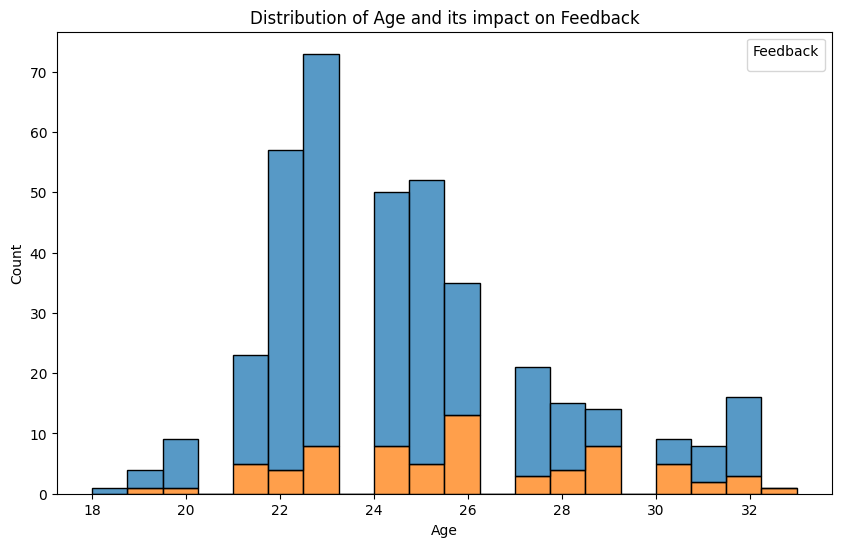

In [ ]:
# Distribution of Age and its impact on Feedback
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Feedback', multiple='stack', bins=20)
plt.title('Distribution of Age and its impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.show()


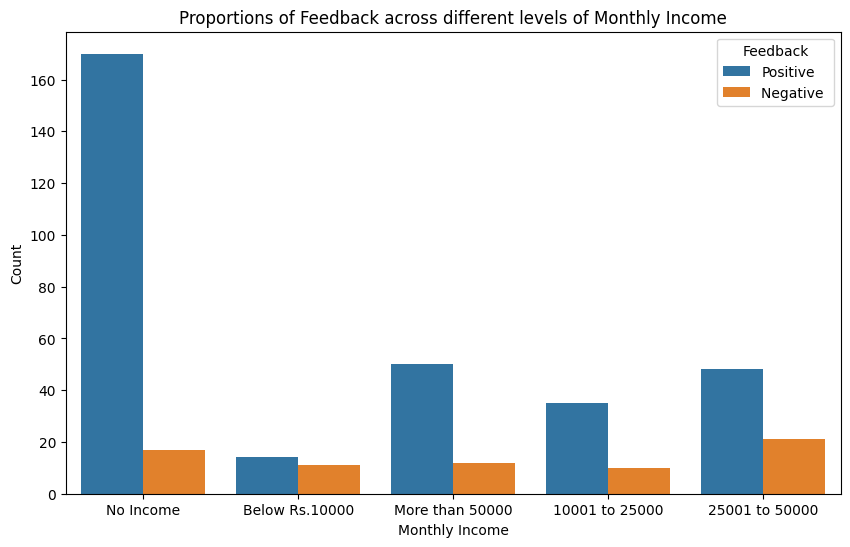

In [ ]:
# Proportions of Feedback across different levels of Monthly Income
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Income', hue='Feedback')
plt.title('Proportions of Feedback across different levels of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.show()

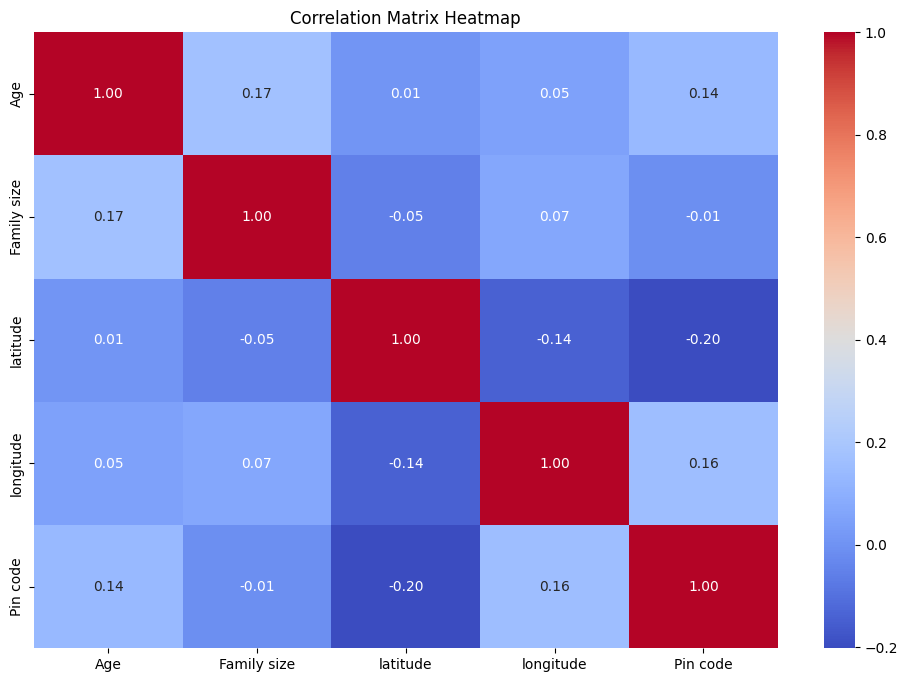

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Part 3: Logistic Regression Model

## Build the Model

In [ ]:
X = df[['Family size','Educational Qualifications']]
X_encoded = pd.get_dummies(X, columns=['Educational Qualifications'], drop_first=True)
y = df['Monthly Income']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation

Accuracy: 0.5897435897435898
Classification Report:
                  precision    recall  f1-score   support

 10001 to 25000       0.00      0.00      0.00         8
 25001 to 50000       0.00      0.00      0.00         8
 Below Rs.10000       0.00      0.00      0.00         5
More than 50000       0.33      0.09      0.14        11
      No Income       0.60      0.98      0.74        46

       accuracy                           0.59        78
      macro avg       0.19      0.21      0.18        78
   weighted avg       0.40      0.59      0.46        78

Confusion Matrix:
[[ 0  0  0  0  8]
 [ 0  0  0  1  7]
 [ 0  0  0  0  5]
 [ 0  0  0  1 10]
 [ 0  0  0  1 45]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


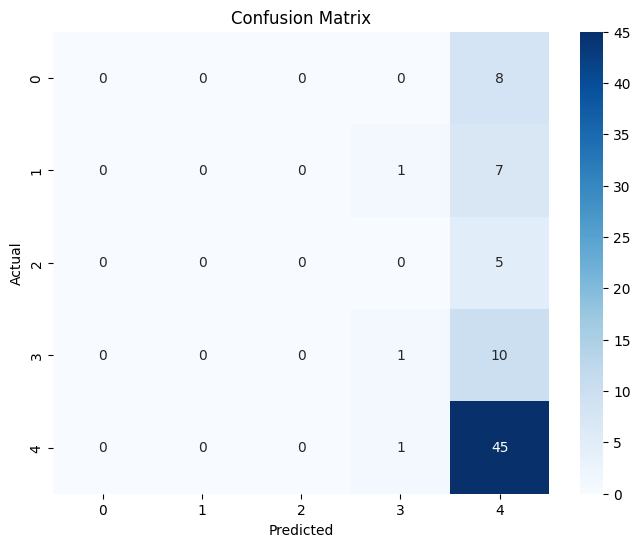

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
#Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Part 4: Data Analysis and Visualization

## Feature Importance

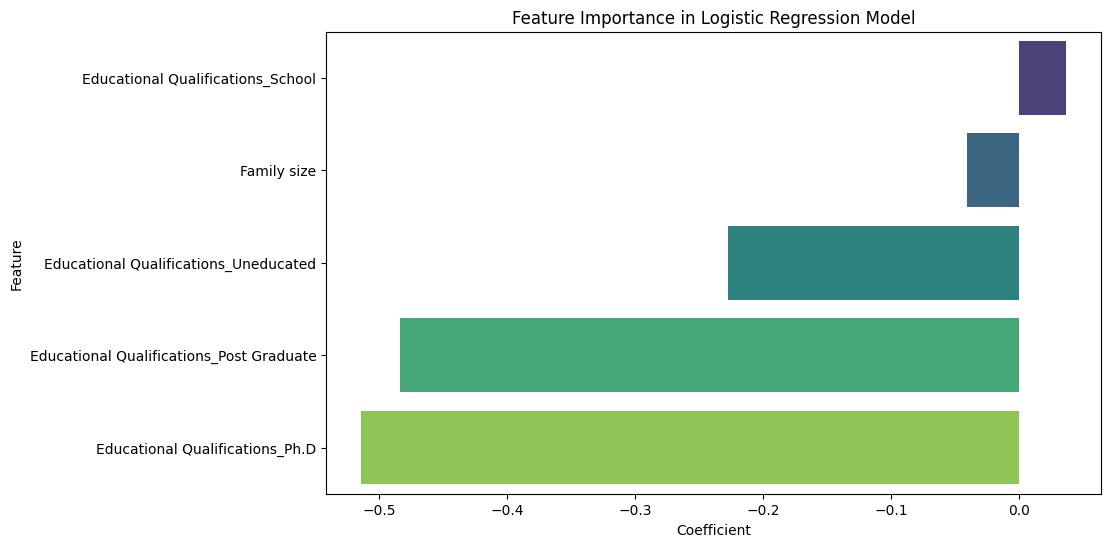

In [ ]:
# Retrieve feature coefficients
feature_importance = model.coef_[0]

# Create a DataFrame to store feature importance
df_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': feature_importance
})

# Sort the DataFrame by coefficient values
df_importance = df_importance.sort_values(by='Coefficient', ascending=False)
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=df_importance, hue='Feature', palette='viridis', legend=False)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()


## Prediction Insights

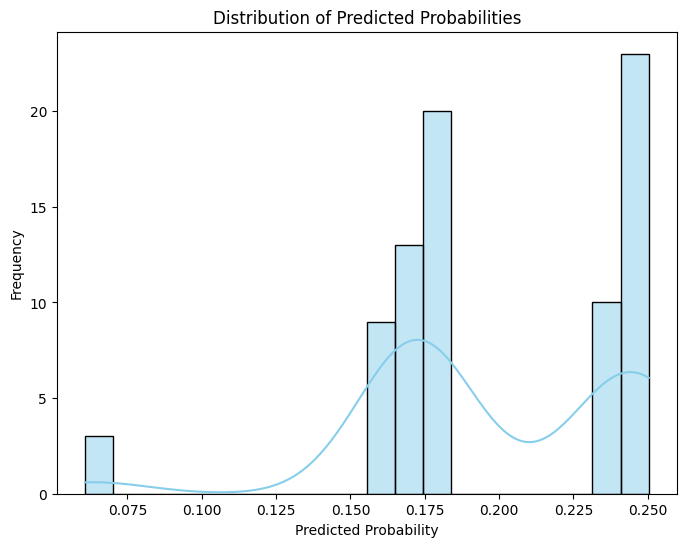

In [ ]:
# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Plot the distribution of predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


By examining the spread and concentration of predicted probabilities, we can measure  the model's confidence in its predictions. If the distribution is narrow and peaks at extreme probabilities (close to 0 or 1), it indicates high confidence. Conversely, a broader distribution suggests lower confidence. Understanding the distribution helps assess the reliability of the model's predictions. If the majority of predictions cluster around the true outcome (0 or 1), it suggests the model is making accurate predictions. However, if there's a wide dispersion or unexpected patterns in the distribution, it may indicate areas where the model struggles to make reliable predictions. Comparing the predicted probabilities against the actual outcomes can provide insights into the model's performance. If the distribution aligns well with the observed outcomes, it suggests the model is effectively capturing the underlying patterns in the data. Conversely, discrepancies between predicted and actual probabilities highlight areas for improvement. The distribution can also inform decisions about the threshold for classification. For instance, if the task involves binary classification (e.g., positive/negative feedback), adjusting the threshold based on the distribution can optimize the trade-off between sensitivity and specificity.